# **<h3 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
    * [4.6. Visualizations](#visualizations)
    * [4.7. Correlation Matrix](#correlation_matrix)

### below just copied from Xana
* [4.8. Outliers](#outliers)
* [5. Creating New Features](#feature_engineering)
    * [5.1. Total Cuisine Spending](#total_cuisine_spending)
    * [5.2. Weekend and Weekday Orders](#weekend_and_weekday_orders)
    * [5.3. Generation](#generation)
    * [5.4. Hourly Orders Aggregation](#hourly_orders_aggregation)
    * [5.5. Healthiness Index](#healthiness_index)
    * [5.6. Last Promotion Indicator](#last_promotion_indicator)
    * [5.7. Chain order percentage](#Chain_order_percentage)

# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import warnings
warnings.filterwarnings("ignore")

# 2. Import the Dataset <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET.

In [64]:
df_original = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv", index_col="customer_id")
df_original.head().T

customer_id              1b8f824d5e 5d272b9dcb f6d1b2ba63 180c632ed8  \
customer_region                2360       8670       4660       4660   
customer_age                   18.0       17.0       38.0        NaN   
vendor_count                      2          2          1          2   
product_count                     5          2          2          3   
is_chain                          1          2          2          1   
first_order                     0.0        0.0        0.0        0.0   
last_order                        1          1          1          2   
last_promo                 DELIVERY   DISCOUNT   DISCOUNT   DELIVERY   
payment_method                 DIGI       DIGI       CASH       DIGI   
CUI_American                    0.0      12.82        9.2        0.0   
CUI_Asian                       0.0       6.39        0.0       13.7   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                    28.88        0.0        0.0      17.86   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             1          1          1          0   
DOW_1                             0          0          0          1   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          1          0   
HR_10                             0          1          0          0   
HR_11                             0          1          1          1   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          0          0          1   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          0   
HR_18                             2          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

In [65]:
df_original.tail().T

customer_id              f4e366c281 f6b6709018 f74ad8ce3f f7b19c0241  \
customer_region                8670       8670       8670       8670   
customer_age                   30.0        NaN       24.0       34.0   
vendor_count                      1          1          1          1   
product_count                     1          1          1          1   
is_chain                          1          0          1          0   
first_order                     NaN        NaN        NaN        NaN   
last_order                        0          0          0          0   
last_promo                  FREEBIE   DELIVERY          -   DISCOUNT   
payment_method                 DIGI       DIGI       DIGI       DIGI   
CUI_American                    0.0      18.04        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0      12.03   
CUI_Beverages                 18.04        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0      17.79        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          1          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          1   
HR_12                             0          0          0          0   
HR_13                             1          0          0          0   
HR_14                             0          0          0          0   
HR_15                             0          0          0          0   
HR_16                             0          1          0          0   
HR_17                             0          0          0          0   
HR_18                             0          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

# 3. Description of the Dataset’s Structure<a class="anchor" id="dataset_structure"></a>
[Back to ToC](#toc)<br>

The <span style="color:Blue"> info()  </span> method prints information about the DataFrame. Using this method we can also see that there are some missing values.
*Notes*:
- customer_age has some missing values
- first_order has some missing values
- HR_0 has some missing values

In [66]:
df_original.shape

(31888, 55)

In [67]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Notes:
- customer age should be a integer
- first order is number of days so should be a integer
- HR_0: convert to int

The <span style="color:Blue"> describe()  </span> method  is used for calculating some statistical data. The features: *customer_name*, *customer_gender*, and *customer_birthdate* don"t have any statistical data since they"re categorical features.

In [68]:
df_original.describe().round(2).T

count   mean    std   min   25%   50%    75%  \
customer_age              31161.0  27.51   7.16  15.0  23.0  26.0  31.00   
vendor_count              31888.0   3.10   2.77   0.0   1.0   2.0   4.00   
product_count             31888.0   5.67   6.96   0.0   2.0   3.0   7.00   
is_chain                  31888.0   2.82   3.98   0.0   1.0   2.0   3.00   
first_order               31782.0  28.48  24.11   0.0   7.0  22.0  45.00   
last_order                31888.0  63.68  23.23   0.0  49.0  70.0  83.00   
CUI_American              31888.0   4.88  11.65   0.0   0.0   0.0   5.66   
CUI_Asian                 31888.0   9.96  23.56   0.0   0.0   0.0  11.83   
CUI_Beverages             31888.0   2.30   8.48   0.0   0.0   0.0   0.00   
CUI_Cafe                  31888.0   0.80   6.43   0.0   0.0   0.0   0.00   
CUI_Chicken Dishes        31888.0   0.77   3.66   0.0   0.0   0.0   0.00   
CUI_Chinese               31888.0   1.43   8.19   0.0   0.0   0.0   0.00   
CUI_Desserts              31888.0   0.88   5.26   0.0   0.0   0.0   0.00   
CUI_Healthy               31888.0   0.95   5.83   0.0   0.0   0.0   0.00   
CUI_Indian                31888.0   1.63   7.44   0.0   0.0   0.0   0.00   
CUI_Italian               31888.0   3.23  11.25   0.0   0.0   0.0   0.00   
CUI_Japanese              31888.0   3.00  10.18   0.0   0.0   0.0   0.00   
CUI_Noodle Dishes         31888.0   0.71   4.54   0.0   0.0   0.0   0.00   
CUI_OTHER                 31888.0   3.00   9.77   0.0   0.0   0.0   0.00   
CUI_Street Food / Snacks  31888.0   3.91  15.55   0.0   0.0   0.0   0.00   
CUI_Thai                  31888.0   0.84   4.43   0.0   0.0   0.0   0.00   
DOW_0                     31888.0   0.56   1.01   0.0   0.0   0.0   1.00   
DOW_1                     31888.0   0.57   1.04   0.0   0.0   0.0   1.00   
DOW_2                     31888.0   0.59   1.05   0.0   0.0   0.0   1.00   
DOW_3                     31888.0   0.62   1.07   0.0   0.0   0.0   1.00   
DOW_4                     31888.0   0.68   1.09   0.0   0.0   0.0   1.00   
DOW_5                     31888.0   0.65   1.07   0.0   0.0   0.0   1.00   
DOW_6                     31888.0   0.70   1.17   0.0   0.0   0.0   1.00   
HR_0                      30723.0   0.00   0.00   0.0   0.0   0.0   0.00   
HR_1                      31888.0   0.05   0.32   0.0   0.0   0.0   0.00   
HR_2                      31888.0   0.06   0.35   0.0   0.0   0.0   0.00   
HR_3                      31888.0   0.12   0.50   0.0   0.0   0.0   0.00   
HR_4                      31888.0   0.10   0.44   0.0   0.0   0.0   0.00   
HR_5                      31888.0   0.08   0.36   0.0   0.0   0.0   0.00   
HR_6                      31888.0   0.07   0.33   0.0   0.0   0.0   0.00   
HR_7                      31888.0   0.08   0.38   0.0   0.0   0.0   0.00   
HR_8                      31888.0   0.13   0.64   0.0   0.0   0.0   0.00   
HR_9                      31888.0   0.23   0.72   0.0   0.0   0.0   0.00   
HR_10                     31888.0   0.33   0.89   0.0   0.0   0.0   0.00   
HR_11                     31888.0   0.38   0.96   0.0   0.0   0.0   0.00   
HR_12                     31888.0   0.31   0.84   0.0   0.0   0.0   0.00   
HR_13                     31888.0   0.24   0.64   0.0   0.0   0.0   0.00   
HR_14                     31888.0   0.22   0.60   0.0   0.0   0.0   0.00   
HR_15                     31888.0   0.28   0.74   0.0   0.0   0.0   0.00   
HR_16                     31888.0   0.36   0.87   0.0   0.0   0.0   0.00   
HR_17                     31888.0   0.39   0.94   0.0   0.0   0.0   0.00   
HR_18                     31888.0   0.34   0.89   0.0   0.0   0.0   0.00   
HR_19                     31888.0   0.25   0.80   0.0   0.0   0.0   0.00   
HR_20                     31888.0   0.14   0.59   0.0   0.0   0.0   0.00   
HR_21                     31888.0   0.07   0.35   0.0   0.0   0.0   0.00   
HR_22                     31888.0   0.05   0.30   0.0   0.0   0.0   0.00   
HR_23                     31888.0   0.05   0.28   0.0   0.0   0.0   0.00   


As we can see the HR_0 is always equal to zero, so we can delete this features. 

In [69]:
df_original.describe(include="object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

In [70]:
df_original["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [71]:
df_original["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

Lets replace the - for None.

In [72]:
df_original["payment_method"].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

<a id = "exploration"></a>

# 4. Exploring the Dataset <a class="anchor" id="a"></a>
[Back to ToC](#toc)<br>

In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don"t offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.

> ## 4.1. Constant features <a class="anchor" id="constant_features"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [73]:
variances = df_original.var(numeric_only=True)
variances[variances == 0]

HR_0    0.0
dtype: float64

In [74]:
df_no_hr0 = df_original.drop("HR_0", axis = 1)

> ## 4.2. Duplicates <a class="anchor" id="duplicates"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

With the <span style="color:Blue"> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had 60 duplicates.

Check for duplicated rows

In [75]:
# duplicated observations
df_no_hr0.duplicated().sum()

np.int64(60)

To ensure data integrity by maintaining the integrity of the original data, reproducibility by enabling iterative analysis and validation of the transformations without changing the original data, it is necessary to make a copy of the original dataset before applying transformations, for that we use the <span style="color:Blue"> copy()  </span> method.

In [76]:
df_no_duplicates = df_no_hr0.drop_duplicates()

In [77]:
df_no_duplicates.duplicated().sum()

np.int64(0)

In [78]:
"HR_0" in df_no_hr0.columns

False

Check for duplicated indexes

In [79]:
df_no_duplicates.index.duplicated().sum()

np.int64(0)

> ## 4.3. Missing values <a class="anchor" id="missing_values"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

As we conclude there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

Disguised Missing Values (identified previously)

In [80]:
df_treat_missing = df_no_duplicates.copy()
df_treat_missing["last_promo"].replace("-", np.nan, inplace=True)
df_treat_missing["customer_region"].replace("-", np.nan, inplace=True)

In [81]:
df_treat_missing["last_promo"].value_counts(dropna=False)

last_promo
NaN         16722
DELIVERY     6271
DISCOUNT     4491
FREEBIE      4344
Name: count, dtype: int64

In [82]:
df_treat_missing["customer_region"].value_counts(dropna=False)

customer_region
8670    9748
4660    9533
2360    8815
2440    1482
4140     856
8370     495
2490     444
NaN      442
8550      13
Name: count, dtype: int64

In [83]:
# calculate percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

last_promo         52.54
customer_age        2.28
customer_region     1.39
first_order         0.33
dtype: float64

"last_promo" has more than 50% of missing values, so we should drop this variable instead of imputing the missing values. For now, let's ignore the remaining mising values

In [84]:
df_treat_missing.drop("last_promo", axis=1, inplace=True)

In [85]:
"last_promo" in df_treat_missing.columns

False

Check how many observations have missing values in more than 1 variable (there are 7 customers)

In [86]:
columns_missing_values = ["customer_age", "customer_region", "first_order"]
df_treat_missing[columns_missing_values].isna().sum(axis=1).value_counts().sort_index()

0    30560
1     1261
2        7
Name: count, dtype: int64

> ## 4.4. Data Types <a class="anchor" id="data_types"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [87]:
df_adjust_dtypes = df_treat_missing.copy()
df_adjust_dtypes.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                         int64
DOW_4                       

- age: should be a integer
- first order: is number of days so should be a integer

In [88]:
# Using "Int64" allows for the representation of NaN values alongside integers
# df_adjust_dtypes["customer_age"] = df_adjust_dtypes["customer_age"].astype("Int64")
# df_adjust_dtypes["first_order"] = df_adjust_dtypes["first_order"].astype("Int64")

In [89]:
df_adjust_dtypes.dtypes[["customer_age", "first_order"]]

customer_age    float64
first_order     float64
dtype: object

In [90]:
# This just doesnt make any sense
# is_chain should be a binary variable 
df_adjust_dtypes.is_chain.value_counts()



is_chain
1     8530
0     6088
2     5883
3     3693
4     2163
5     1378
6      945
7      678
8      498
9      371
10     291
11     248
12     169
13     152
14     138
15      89
16      68
18      65
17      55
19      35
20      34
21      29
22      26
24      22
23      20
26      20
27      16
25      14
28      13
29      10
31       9
30       9
32       8
33       6
34       6
36       5
43       5
40       5
37       4
35       4
45       4
39       2
42       2
48       2
75       1
63       1
54       1
83       1
49       1
46       1
61       1
44       1
67       1
56       1
81       1
73       1
47       1
38       1
65       1
80       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of is_chain')

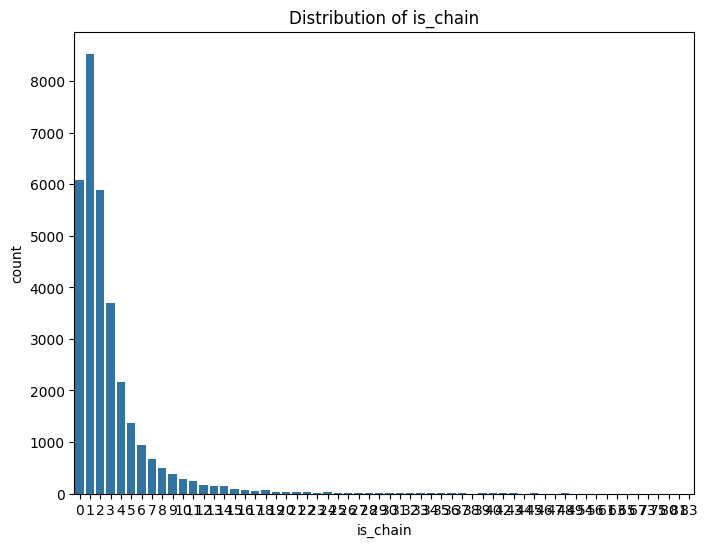

In [91]:
# show distribution of is_chain column 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_adjust_dtypes, x="is_chain")
plt.title("Distribution of is_chain")


> ## 4.5. Coherence Checking <a class="anchor" id="coherence_checking"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [92]:
df_inconsistencies = df_adjust_dtypes.copy()

Verify if there are minor customers (should not exist, because they are not allowed to placed orders online)

In [93]:
# Check the age distribution
df_inconsistencies["customer_age"].describe()

count    31101.000000
mean        27.508376
std          7.164141
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

In [94]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

minor_customers.describe().round(2).T

Number of customers under 18 years old: 365 (1.15%)


count   mean    std   min   25%   50%    75%     max
customer_age              365.0  16.68   0.57  15.0  16.0  17.0  17.00   17.00
vendor_count              365.0   2.97   2.53   0.0   1.0   2.0   4.00   18.00
product_count             365.0   5.35   6.73   0.0   2.0   3.0   6.00   75.00
is_chain                  365.0   2.76   5.10   0.0   1.0   1.0   3.00   75.00
first_order               365.0  29.16  23.73   0.0  10.0  23.0  46.00   89.00
last_order                365.0  62.57  23.85   1.0  48.0  69.0  83.00   90.00
CUI_American              365.0   4.83  12.10   0.0   0.0   0.0   4.65  116.80
CUI_Asian                 365.0   8.65  17.45   0.0   0.0   0.0  10.51  100.18
CUI_Beverages             365.0   2.95  12.77   0.0   0.0   0.0   0.00  173.16
CUI_Cafe                  365.0   0.25   1.64   0.0   0.0   0.0   0.00   14.25
CUI_Chicken Dishes        365.0   0.72   2.68   0.0   0.0   0.0   0.00   20.77
CUI_Chinese               365.0   1.44   5.51   0.0   0.0   0.0   0.00   42.61
CUI_Desserts              365.0   0.81   3.97   0.0   0.0   0.0   0.00   37.17
CUI_Healthy               365.0   0.90   6.16   0.0   0.0   0.0   0.00  100.88
CUI_Indian                365.0   1.81   6.61   0.0   0.0   0.0   0.00   74.42
CUI_Italian               365.0   2.62   7.67   0.0   0.0   0.0   0.00   61.72
CUI_Japanese              365.0   2.39   6.82   0.0   0.0   0.0   0.00   57.64
CUI_Noodle Dishes         365.0   0.36   2.02   0.0   0.0   0.0   0.00   25.84
CUI_OTHER                 365.0   2.92   7.47   0.0   0.0   0.0   0.00   54.44
CUI_Street Food / Snacks  365.0   3.05  10.51   0.0   0.0   0.0   0.00   85.12
CUI_Thai                  365.0   0.84   3.98   0.0   0.0   0.0   0.00   52.67
DOW_0                     365.0   0.55   1.10   0.0   0.0   0.0   1.00   11.00
DOW_1                     365.0   0.56   1.07   0.0   0.0   0.0   1.00   11.00
DOW_2                     365.0   0.53   1.07   0.0   0.0   0.0   1.00   14.00
DOW_3                     365.0   0.58   1.06   0.0   0.0   0.0   1.00    9.00
DOW_4                     365.0   0.70   1.22   0.0   0.0   0.0   1.00   10.00
DOW_5                     365.0   0.63   1.16   0.0   0.0   0.0   1.00   10.00
DOW_6                     365.0   0.68   1.20   0.0   0.0   0.0   1.00   10.00
HR_1                      365.0   0.07   0.33   0.0   0.0   0.0   0.00    4.00
HR_2                      365.0   0.07   0.35   0.0   0.0   0.0   0.00    5.00
HR_3                      365.0   0.12   0.50   0.0   0.0   0.0   0.00    5.00
HR_4                      365.0   0.12   0.53   0.0   0.0   0.0   0.00    7.00
HR_5                      365.0   0.06   0.30   0.0   0.0   0.0   0.00    2.00
HR_6                      365.0   0.07   0.27   0.0   0.0   0.0   0.00    2.00
HR_7                      365.0   0.11   0.75   0.0   0.0   0.0   0.00   13.00
HR_8                      365.0   0.24   2.75   0.0   0.0   0.0   0.00   52.00
HR_9                      365.0   0.18   0.59   0.0   0.0   0.0   0.00    4.00
HR_10                     365.0   0.30   0.70   0.0   0.0   0.0   0.00    5.00
HR_11                     365.0   0.35   0.78   0.0   0.0   0.0   0.00    7.00
HR_12                     365.0   0.30   0.77   0.0   0.0   0.0   0.00    7.00
HR_13                     365.0   0.20   0.53   0.0   0.0   0.0   0.00    4.00
HR_14                     365.0   0.21   0.62   0.0   0.0   0.0   0.00    7.00
HR_15                     365.0   0.25   0.67   0.0   0.0   0.0   0.00    5.00
HR_16                     365.0   0.34   0.78   0.0   0.0   0.0   0.00    7.00
HR_17                     365.0   0.41   1.03   0.0   0.0   0.0   0.00    9.00
HR_18                     365.0   0.31   0.91   0.0   0.0   0.0   0.00   10.00
HR_19                     365.0   0.21   0.60   0.0   0.0   0.0   0.00    5.00
HR_20                     365.0   0.13   0.63   0.0   0.0   0.0   0.00    7.00
HR_21                     365.0   0.06   0.38   0.0   0.0   0.0   0.00    6.00
HR_22                     365.0   0.05   0.32   0.0   0.0   0.0   0.00    5.

In [95]:
minor_customers.describe(include="object")

customer_region payment_method
count              360            365
unique               7              3
top               4660           CARD
freq               110            228

Given that only 1.14% of your customers are minors we can decide to remove these customers. Removing these customers can lead to more accurate analysis and insights relevant to the target demographic.

In [96]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[df_inconsistencies["customer_age"] >= 18]

# Verify the removal
remaining_minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
print(f"Remaining customers under 18 years old: {len(remaining_minor_customers)}")

Remaining customers under 18 years old: 0


**Explore "is_chain" variable**

* First thought is that is_chain is a binary
* Second thought: is_chain tracks amount of chain restaurant orders
    * binary does not make any sense as one row contains data about one customer

In [97]:
df_inconsistencies["is_chain"].describe()

count    30736.000000
mean         2.816014
std          3.963148
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

Sum the amount of orders per customer to compare with is_chain

In [98]:
# Count the amount of orders per customer 

# Use the HR column to sum up the number of orders per customer
HR_col = [column for column in df_inconsistencies.columns if "HR" in column]

# Create a new column with the total number of orders per customer
df_inconsistencies["num_orders"] = df_inconsistencies[HR_col].sum(axis = 1)

In [99]:
# check where no_orders is smaller than is_chain
df_inconsistencies['order_gap'] = df_inconsistencies["num_orders"] - df_inconsistencies["is_chain"]


# check where no_orders is smaller than is_chain 
df_inconsistencies[df_inconsistencies['order_gap'] < 0][['num_orders', 'is_chain', 'order_gap']]

# order the order_gap by descending order and count the number of customers with negative order_gap
df_inconsistencies['order_gap'].value_counts().sort_index()

# Small no of customers with negative order_gap
num_neg_orders = round(df_inconsistencies[df_inconsistencies['order_gap'] < 0].shape[0] / len(df_inconsistencies) * 100, 2)
print(f"Number of customers with negative order gap: {num_neg_orders}%")


Number of customers with negative order gap: 1.33%


We assume that is_chain tracks how often a customer has ordered from a chain restaurant.

The small amount of rows where is_chain is bigger than the amount of orders can be reasoned with bad data tracking


**Check if CUI_Asian is equal to the sum of the specific cuisine types (chinese, japonese, etc)**

In [100]:
# Select all columns that start with "CUI_"
df_inconsistencies.filter(like="CUI_").columns

Index(['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'],
      dtype='object')

In [101]:
# Define broader categories and their specific subcategories
asian_cuisines = ['CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Create the sum of specific Asian cuisines
sum_asian_cuisines = df_inconsistencies[asian_cuisines].sum(axis=1)

# Compare CUI_Asian with the sum of specific Asian cuisines
asian_cuisine_inconsistencies = df_inconsistencies[df_inconsistencies['CUI_Asian'] != sum_asian_cuisines]

# Check how many rows are inconsistent
num_inconsistent_rows = len(asian_cuisine_inconsistencies)
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

print(f"Number of inconsistent rows: {num_inconsistent_rows} ({round(perc_inconsistent_rows, 2)}%)")

Number of inconsistent rows: 20302 (66.05%)


This inconsistency should be further explored. It might be due to classification of restaurants in the app (for example, some restaurants are considered CUI_Asian and CUI_Japonese, while others are just considered CUI_Asian)

In [102]:
# Calculate the differences between "last_order" and "first_order"
diffs = (df_inconsistencies['CUI_Asian'] - sum_asian_cuisines).abs()

# Display how many rows have certain differences
print("\nCounts of differences between CUI_Asian and sum of specific Asian cuisines:")
diffs.value_counts().sort_index()


Counts of differences between CUI_Asian and sum of specific Asian cuisines:


0.00       10434
0.01           1
0.01           4
0.02           4
0.03           2
           ...  
435.64         1
470.80         1
706.14         1
896.71         1
1061.25        1
Name: count, Length: 7503, dtype: int64

Verify that last_order is lower than or equal to first_order for each customer

In [103]:
# Drop rows with missing values in "first_order" ("last_order" has no missing values)
data_cleaned = df_inconsistencies.dropna(subset="first_order")

# Check when "last_order" is greater than "first_order"
is_last_order_greater = data_cleaned["last_order"] > data_cleaned["first_order"]

# Calculate the percentage of inconsistent rows based on the original dataframe
perc_inconsistencies = is_last_order_greater.sum() / len(df_inconsistencies) * 100

# Output the percentage of rows where "last_order" is greater than "first_order"
print(f"Inconsistent rows: {perc_inconsistencies.round(2)}%")

# Calculate the differences between "last_order" and "first_order"
diffs = data_cleaned["last_order"] - data_cleaned["first_order"]

# Display how many rows have certain differences
print("\nCounts of differences between last_order and first_order:")
diffs.value_counts().sort_index()

Inconsistent rows: 77.1%

Counts of differences between last_order and first_order:


0.0     6936
1.0      331
2.0      253
3.0      231
4.0      225
        ... 
86.0     221
87.0     220
88.0     166
89.0     120
90.0       1
Name: count, Length: 91, dtype: int64

Possible approach: Since 77.11% of the entries have last_order greater than first_order, this suggests a serious issue with these columns. If the inconsistencies cannot be resolved, it may be better to remove them

Let"s analyze the inconsistencies

In [104]:
# Rows where the sums are inconsistent
inconsistencies = df_inconsistencies["last_order"] > df_inconsistencies["first_order"]

# Get summary statistics of the inconsistent rows
df_inconsistencies[inconsistencies].describe().T

count       mean        std   min   25%   50%  \
customer_age              23696.0  27.655005   7.102139  18.0  23.0  26.0   
vendor_count              23696.0   3.723455   2.884429   1.0   2.0   3.0   
product_count             23696.0   6.929946   7.461853   1.0   3.0   5.0   
is_chain                  23696.0   3.466112   4.294688   0.0   1.0   2.0   
first_order               23696.0  23.124873  20.629582   0.0   6.0  18.0   
last_order                23696.0  68.865800  19.303897   1.0  59.0  75.0   
CUI_American              23696.0   5.857132  12.806283   0.0   0.0   0.0   
CUI_Asian                 23696.0  11.784475  26.145777   0.0   0.0   0.0   
CUI_Beverages             23696.0   2.690277   9.235709   0.0   0.0   0.0   
CUI_Cafe                  23696.0   0.998426   7.286348   0.0   0.0   0.0   
CUI_Chicken Dishes        23696.0   0.942086   4.098196   0.0   0.0   0.0   
CUI_Chinese               23696.0   1.745365   9.283469   0.0   0.0   0.0   
CUI_Desserts              23696.0   1.011809   5.714621   0.0   0.0   0.0   
CUI_Healthy               23696.0   1.161465   6.523452   0.0   0.0   0.0   
CUI_Indian                23696.0   1.885615   8.234675   0.0   0.0   0.0   
CUI_Italian               23696.0   3.896308  12.673678   0.0   0.0   0.0   
CUI_Japanese              23696.0   3.556865  11.316077   0.0   0.0   0.0   
CUI_Noodle Dishes         23696.0   0.877479   5.104073   0.0   0.0   0.0   
CUI_OTHER                 23696.0   3.616616  10.693531   0.0   0.0   0.0   
CUI_Street Food / Snacks  23696.0   4.374215  16.914423   0.0   0.0   0.0   
CUI_Thai                  23696.0   1.017532   4.893342   0.0   0.0   0.0   
DOW_0                     23696.0   0.686318   1.105749   0.0   0.0   0.0   
DOW_1                     23696.0   0.703958   1.142076   0.0   0.0   0.0   
DOW_2                     23696.0   0.733499   1.139556   0.0   0.0   0.0   
DOW_3                     23696.0   0.765066   1.164922   0.0   0.0   0.0   
DOW_4                     23696.0   0.826342   1.171123   0.0   0.0   0.0   
DOW_5                     23696.0   0.786588   1.159669   0.0   0.0   0.0   
DOW_6                     23696.0   0.856389   1.270276   0.0   0.0   0.0   
HR_1                      23696.0   0.064863   0.353042   0.0   0.0   0.0   
HR_2                      23696.0   0.076511   0.392496   0.0   0.0   0.0   
HR_3                      23696.0   0.142851   0.554878   0.0   0.0   0.0   
HR_4                      23696.0   0.120569   0.483993   0.0   0.0   0.0   
HR_5                      23696.0   0.099257   0.399226   0.0   0.0   0.0   
HR_6                      23696.0   0.084149   0.365430   0.0   0.0   0.0   
HR_7                      23696.0   0.093433   0.415217   0.0   0.0   0.0   
HR_8                      23696.0   0.160871   0.638656   0.0   0.0   0.0   
HR_9                      23696.0   0.288234   0.805901   0.0   0.0   0.0   
HR_10                     23696.0   0.406313   0.986467   0.0   0.0   0.0   
HR_11                     23696.0   0.466999   1.071021   0.0   0.0   0.0   
HR_12                     23696.0   0.388800   0.939508   0.0   0.0   0.0   
HR_13                     23696.0   0.292454   0.707876   0.0   0.0   0.0   
HR_14                     23696.0   0.264180   0.663911   0.0   0.0   0.0   
HR_15                     23696.0   0.336766   0.819642   0.0   0.0   0.0   
HR_16                     23696.0   0.437078   0.968118   0.0   0.0   0.0   
HR_17                     23696.0   0.477000   1.045887   0.0   0.0   0.0   
HR_18                     23696.0   0.413952   0.996651   0.0   0.0   0.0   
HR_19                     23696.0   0.303511   0.884204   0.0   0.0   0.0   
HR_20                     23696.0   0.176739   0.660073   0.0   0.0   0.0   
HR_21                     23696.0   0.088496   0.391265   0.0   0.0   0.0   
HR_22                     23696.0   0.059504   0.334806   0.0   0.0   0.0   
HR_23                     23696.0   0.055917   0.316722   0.0   0.0   0.0   
num_orders              

In [105]:
df_inconsistencies[inconsistencies].describe(include="object")

customer_region payment_method
count            23397          23696
unique               8              3
top               4660           CARD
freq              7161          16521

Check that the sum of orders by day (DOW_0 to DOW_6) matches the total number of orders from hourly data (HR_1 to HR_23)

In [106]:
# Sum of DOW columns (DOW_0 to DOW_6)
dow_columns = [f"DOW_{i}" for i in range(7)]
dow_sum = df_inconsistencies[dow_columns].sum(axis=1)

# Sum of HR columns (HR_0 to HR_23, including HR_0)
hr_columns = [f"HR_{i}" for i in range(1, 24)]
hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Check if the sums are equal
sums_equal = dow_sum != hr_sum

# Output the percentage of rows where DOW sum and HR sum are different
perc_inconsistent = sums_equal.sum() / len(df_inconsistencies) * 100
print(f"Inconsistent rows: {perc_inconsistent.round(2)}%")

# Calculate and display the absolute differences
sums_diff = (dow_sum - hr_sum).abs()

# Display how many rows have certain differences
print("\nCounts of differences between dow_sum and hr_sum:")
sums_diff.value_counts().sort_index()

Inconsistent rows: 3.66%

Counts of differences between dow_sum and hr_sum:


0     29610
1       907
2       151
3        37
4        15
5         7
6         2
7         1
8         1
9         2
11        1
12        1
15        1
Name: count, dtype: int64

Possible approach:
- small inconsistencies (e.g., 1-2 orders): Adjust values (also because they represent the highest amount of inconsistencies).
- large inconsistencies: Investigate patterns, and remove if they appear random (also because they represent a very small part of the dataset).

Let"s analyze the small inconsistencies

In [107]:
# Rows where the sums are inconsistent
df_small_inconsistencies = df_inconsistencies[sums_diff <= 2]

# Get summary statistics of the inconsistent rows
df_small_inconsistencies.describe().T

count       mean        std   min   25%   50%  \
customer_age              30668.0  27.635190   7.104640  18.0  23.0  26.0   
vendor_count              30668.0   3.090127   2.752523   0.0   1.0   2.0   
product_count             30668.0   5.630331   6.879825   0.0   2.0   3.0   
is_chain                  30668.0   2.799530   3.907069   0.0   1.0   2.0   
first_order               30564.0  28.509652  24.119814   0.0   7.0  22.0   
last_order                30668.0  63.609071  23.249126   0.0  49.0  70.0   
CUI_American              30668.0   4.862451  11.610541   0.0   0.0   0.0   
CUI_Asian                 30668.0   9.814300  23.097060   0.0   0.0   0.0   
CUI_Beverages             30668.0   2.267403   8.325955   0.0   0.0   0.0   
CUI_Cafe                  30668.0   0.800740   6.446516   0.0   0.0   0.0   
CUI_Chicken Dishes        30668.0   0.763161   3.617396   0.0   0.0   0.0   
CUI_Chinese               30668.0   1.424656   8.253821   0.0   0.0   0.0   
CUI_Desserts              30668.0   0.873134   5.241389   0.0   0.0   0.0   
CUI_Healthy               30668.0   0.947366   5.817857   0.0   0.0   0.0   
CUI_Indian                30668.0   1.629666   7.478506   0.0   0.0   0.0   
CUI_Italian               30668.0   3.254563  11.351536   0.0   0.0   0.0   
CUI_Japanese              30668.0   2.979077  10.138605   0.0   0.0   0.0   
CUI_Noodle Dishes         30668.0   0.713675   4.547671   0.0   0.0   0.0   
CUI_OTHER                 30668.0   2.995095   9.613416   0.0   0.0   0.0   
CUI_Street Food / Snacks  30668.0   3.877135  15.357309   0.0   0.0   0.0   
CUI_Thai                  30668.0   0.832172   4.376206   0.0   0.0   0.0   
DOW_0                     30668.0   0.551161   1.004940   0.0   0.0   0.0   
DOW_1                     30668.0   0.563975   1.033995   0.0   0.0   0.0   
DOW_2                     30668.0   0.587127   1.037564   0.0   0.0   0.0   
DOW_3                     30668.0   0.615625   1.062697   0.0   0.0   0.0   
DOW_4                     30668.0   0.673666   1.077250   0.0   0.0   0.0   
DOW_5                     30668.0   0.648657   1.060428   0.0   0.0   0.0   
DOW_6                     30668.0   0.699557   1.156963   0.0   0.0   0.0   
HR_1                      30668.0   0.051193   0.306644   0.0   0.0   0.0   
HR_2                      30668.0   0.062117   0.348598   0.0   0.0   0.0   
HR_3                      30668.0   0.117941   0.496980   0.0   0.0   0.0   
HR_4                      30668.0   0.099387   0.427213   0.0   0.0   0.0   
HR_5                      30668.0   0.081583   0.358795   0.0   0.0   0.0   
HR_6                      30668.0   0.069193   0.328094   0.0   0.0   0.0   
HR_7                      30668.0   0.076073   0.371548   0.0   0.0   0.0   
HR_8                      30668.0   0.129842   0.568317   0.0   0.0   0.0   
HR_9                      30668.0   0.233631   0.721702   0.0   0.0   0.0   
HR_10                     30668.0   0.328257   0.883880   0.0   0.0   0.0   
HR_11                     30668.0   0.376712   0.940407   0.0   0.0   0.0   
HR_12                     30668.0   0.313389   0.842062   0.0   0.0   0.0   
HR_13                     30668.0   0.236501   0.637459   0.0   0.0   0.0   
HR_14                     30668.0   0.215273   0.599528   0.0   0.0   0.0   
HR_15                     30668.0   0.276640   0.739597   0.0   0.0   0.0   
HR_16                     30668.0   0.356854   0.874351   0.0   0.0   0.0   
HR_17                     30668.0   0.390211   0.941906   0.0   0.0   0.0   
HR_18                     30668.0   0.337453   0.894557   0.0   0.0   0.0   
HR_19                     30668.0   0.244946   0.789601   0.0   0.0   0.0   
HR_20                     30668.0   0.142168   0.581341   0.0   0.0   0.0   
HR_21                     30668.0   0.071084   0.345609   0.0   0.0   0.0   
HR_22                     30668.0   0.047346   0.293252   0.0   0.0   0.0   
HR_23                     30668.0   0.042552   0.260024   0.0   0.0   0.0   
num_orders              

In [108]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_small_inconsistencies.describe(include="object")

customer_region payment_method
count            30235          30668
unique               8              3
top               8670           CARD
freq              9384          19378

Let's treat the inconsistencies in DOW and HR

Small inconsistencies (the "problem" is that we'll be converting DOW columns to floating numbers, due to the adjustment factor). Therefore, for now let's just remove these inconsistencies

In [109]:
# Identify small inconsistencies (1 or 2 orders)
# small_inconsistencies_mask = (sums_diff == 1) | (sums_diff == 2)

# Identify large inconsistencies (> 2 orders)
# large_inconsistencies_mask = sums_diff > 2

# Adjust the smaller sum (either DOW or HR) to match the larger one for small inconsistencies

# Create a mask for rows with small inconsistencies
# small_dow_sum = dow_sum[small_inconsistencies_mask]
# small_hr_sum = hr_sum[small_inconsistencies_mask]

# Calculate the adjustment factor for small inconsistencies
# adjustment_factors = small_hr_sum / small_dow_sum

# We broadcast the adjustment factors to the corresponding rows in dow_columns
# df_inconsistencies.loc[small_inconsistencies_mask, dow_columns] *= adjustment_factors.values[:, np.newaxis]

# Recalculate sums after adjustments to verify the changes
# adjusted_dow_sum = df_inconsistencies[dow_columns].sum(axis=1)
# adjusted_hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Update the difference calculation after adjustments
# adjusted_sums_diff = (adjusted_dow_sum - adjusted_hr_sum).abs()

# Check if small inconsistencies have been successfully treated
# small_inconsistencies_treated_count = ((adjusted_sums_diff == 1) | (adjusted_sums_diff == 2)).sum()

# Print the count of small inconsistencies after treatment
# print(f"Count of small inconsistencies after treatment: {small_inconsistencies_treated_count}")

In [110]:
# Identify the rows with inconsistencies
inconsistencies_mask = sums_diff > 0

# Remove inconsistent rows from the DataFrame
df_inconsistencies = df_inconsistencies[~inconsistencies_mask].copy()

# Recalculate the sums for DOW and HR columns after removal
cleaned_dow_sum = df_inconsistencies[dow_columns].sum(axis=1)
cleaned_hr_sum_cleaned = df_inconsistencies[hr_columns].sum(axis=1)

# Calculate the differences again
sums_diff_cleaned = (cleaned_dow_sum - cleaned_hr_sum_cleaned).abs()

# Check if there are any remaining inconsistencies
remaining_inconsistencies_count = (sums_diff_cleaned > 2).sum()

# Print results to verify
print(f"Number of remaining inconsistencies after cleaning: {remaining_inconsistencies_count}")

Number of remaining inconsistencies after cleaning: 0


Total Orders Consistency: The total number of orders placed (the sum of the DOW/HR columns) should not exceed the total number of products ordered (product_count).<br>

Vendor Count Consistency: The vendor_count should not exceed the number of unique products ordered, since each product should come from a vendor. This ensures that the recorded count of unique vendors matches the reality of product purchases.

In [111]:
# Calculate total orders based on DOW columns
total_orders = df_inconsistencies[dow_columns].sum(axis=1)

# Check if total orders are less than product count
inconsistent_orders = total_orders > df_inconsistencies['product_count']

# Check if vendor count exceeds product count
inconsistent_vendors = df_inconsistencies['vendor_count'] > df_inconsistencies['product_count']

# Combine both conditions to find all inconsistencies
inconsistencies_mask = inconsistent_orders | inconsistent_vendors

# Count the number of inconsistent rows
num_inconsistent_rows = inconsistencies_mask.sum()

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {num_inconsistent_rows} ({perc_inconsistent_rows.round(2)}%)")

Number of inconsistent rows: 18 (0.06%)


Check if the rows with inconsistencies in orders and vendors are the same

In [112]:
# Check if the indices of both inconsistency sets are the same
inconsistent_rows_same = inconsistent_orders.index.equals(inconsistent_vendors.index)

# Step 2: Output the result
if inconsistent_rows_same:
    print("The rows with inconsistencies in orders and vendors are the same.")
else:
    print("There are differences in the rows with inconsistencies between orders and vendors.")

The rows with inconsistencies in orders and vendors are the same.


In [113]:
df_inconsistencies[inconsistencies_mask].head().T

customer_id              aed85972bb b2ebe2e6e0 6f723d9894 9d74f2ac81  \
customer_region                4660       4660       4660       4660   
customer_age                   27.0       43.0       36.0       27.0   
vendor_count                      1          1          1          1   
product_count                     0          0          0          0   
is_chain                          0          0          0          0   
first_order                     6.0        6.0       13.0       19.0   
last_order                        6          6         13         19   
payment_method                 CARD       CARD       CASH       CARD   
CUI_American                    0.0        0.0        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0        0.0   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0      19.03   
CUI_Italian                    2.56       6.74       7.77        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          1   
DOW_5                             1          1          1          0   
DOW_6                             0          0          0          0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          0   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          1          1          0   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          1   
HR_18                             1          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0          0          0          0   
num_orders                        1          1          1          1   
order_gap                         1     

In [114]:
# Remove rows with inconsistencies in total orders or vendor count
df_inconsistencies = df_inconsistencies[~inconsistencies_mask]

Final Step: Calculate the Percentage of Rows Removed Due to Inconsistencies

In [115]:
# Calculate the number of rows removed
rows_removed = len(df_adjust_dtypes) - len(df_inconsistencies)

# Calculate the percentage of rows removed
percentage_removed = rows_removed / len(df_adjust_dtypes) * 100

# Output the result
print(f"Rows removed due to inconsistencies: {rows_removed} ({round(percentage_removed, 2)}%)")

Rows removed due to inconsistencies: 2236 (7.03%)


> ## 4.6. Visualizations <a class="anchor" id="visualizations"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [116]:
df_visualizations = df_inconsistencies.copy()

In [117]:
df_visualizations.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'num_orders', 'order_gap'],
      dtype='object')

In [118]:
# Define metric and non-metric features
metric_features = df_visualizations.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_visualizations.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR columns from metric features
metric_features_excluding_dow = [feat for feat in metric_features if feat not in dow_columns]
metric_features_excluding_hr = [feat for feat in metric_features if feat not in hr_columns]

# Exclude both DOW and HR columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]

# Output the results
print(f"Non-metric features: {non_metric_features}")
print(f"Metric features (excluding DOW): {metric_features_excluding_dow}")
print(f"Metric features (excluding HR): {metric_features_excluding_hr}")
print(f"Metric features (excluding DOW and HR): {metric_features_excluding_dow_and_hr}")

Non-metric features: ['customer_region', 'payment_method']
Metric features (excluding DOW): ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'num_orders', 'order_gap']
Metric features (excluding HR): ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / 

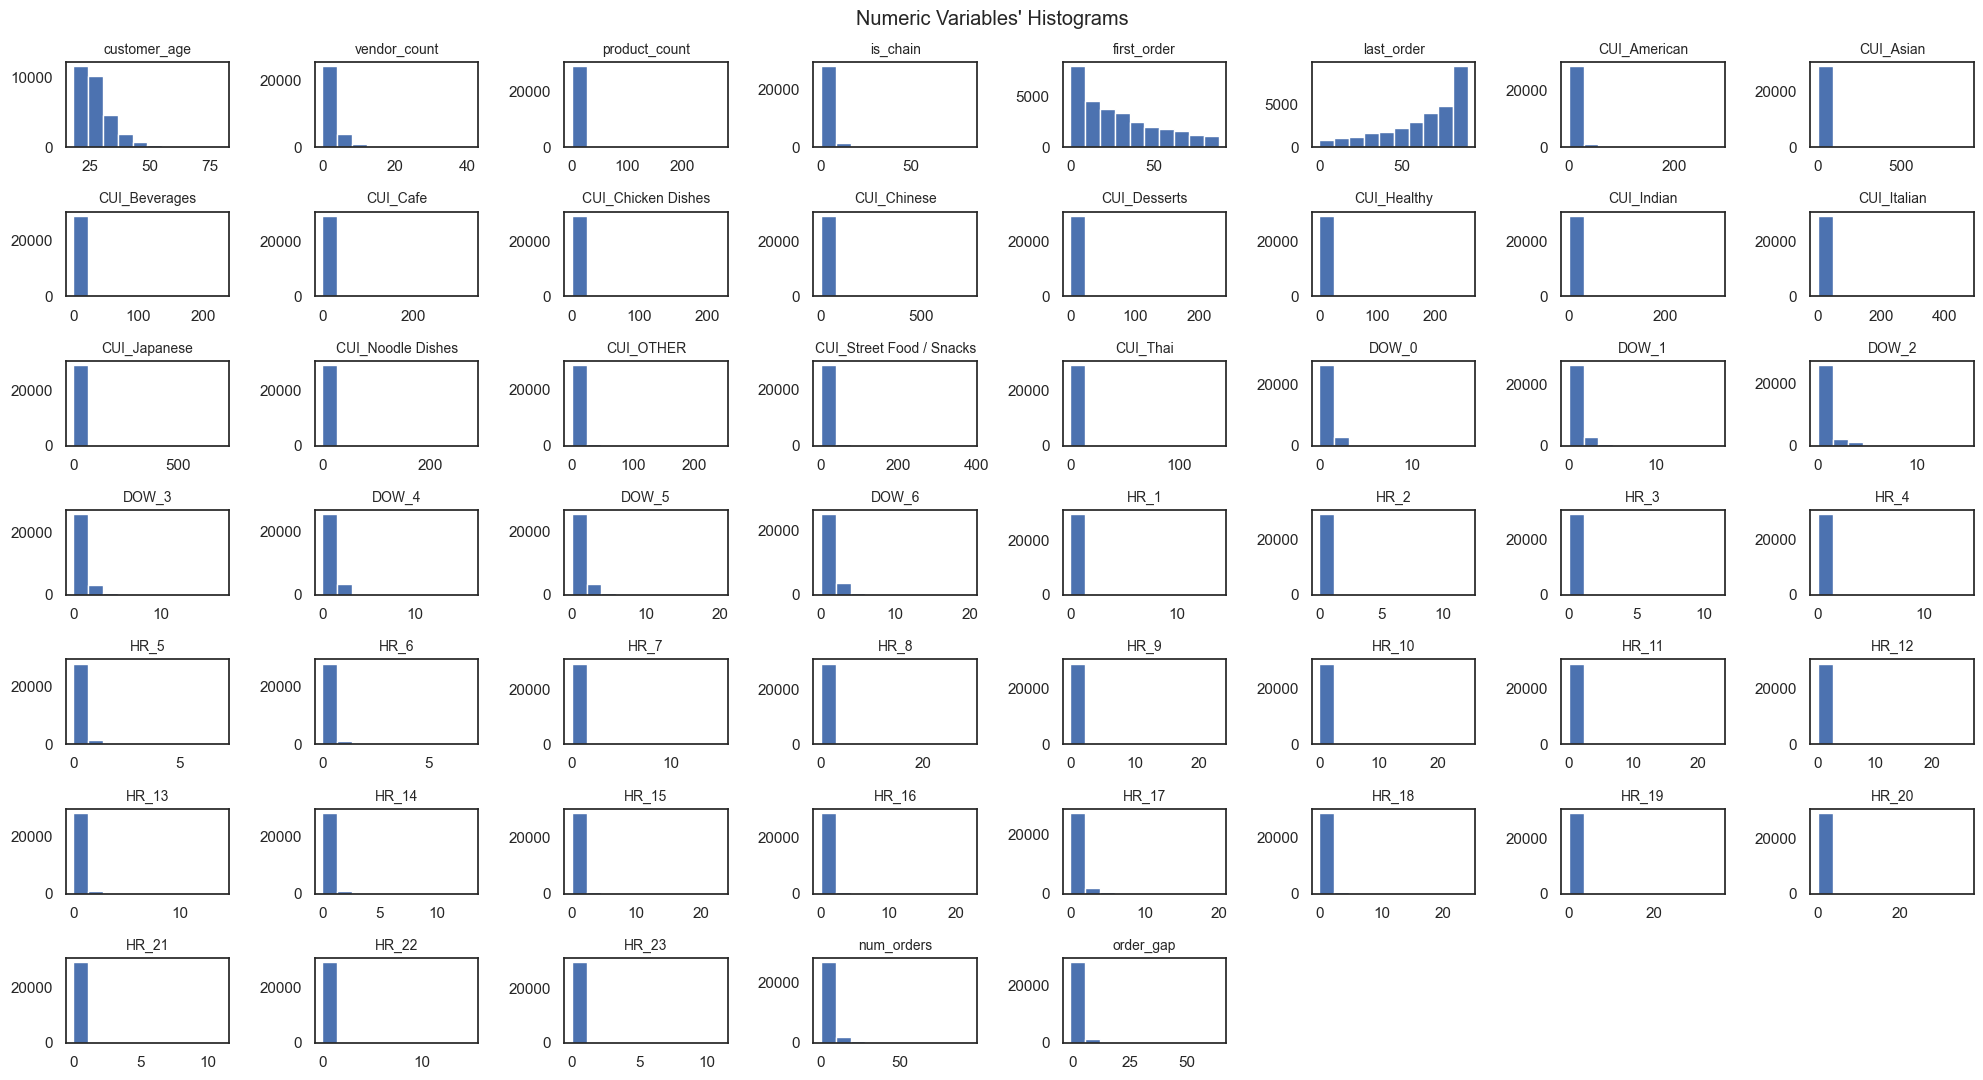

In [119]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df_visualizations[feat])
    ax.set_title(feat, fontsize=10)  # Title with a clean size

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

sns.set() ## Reset to darkgrid 

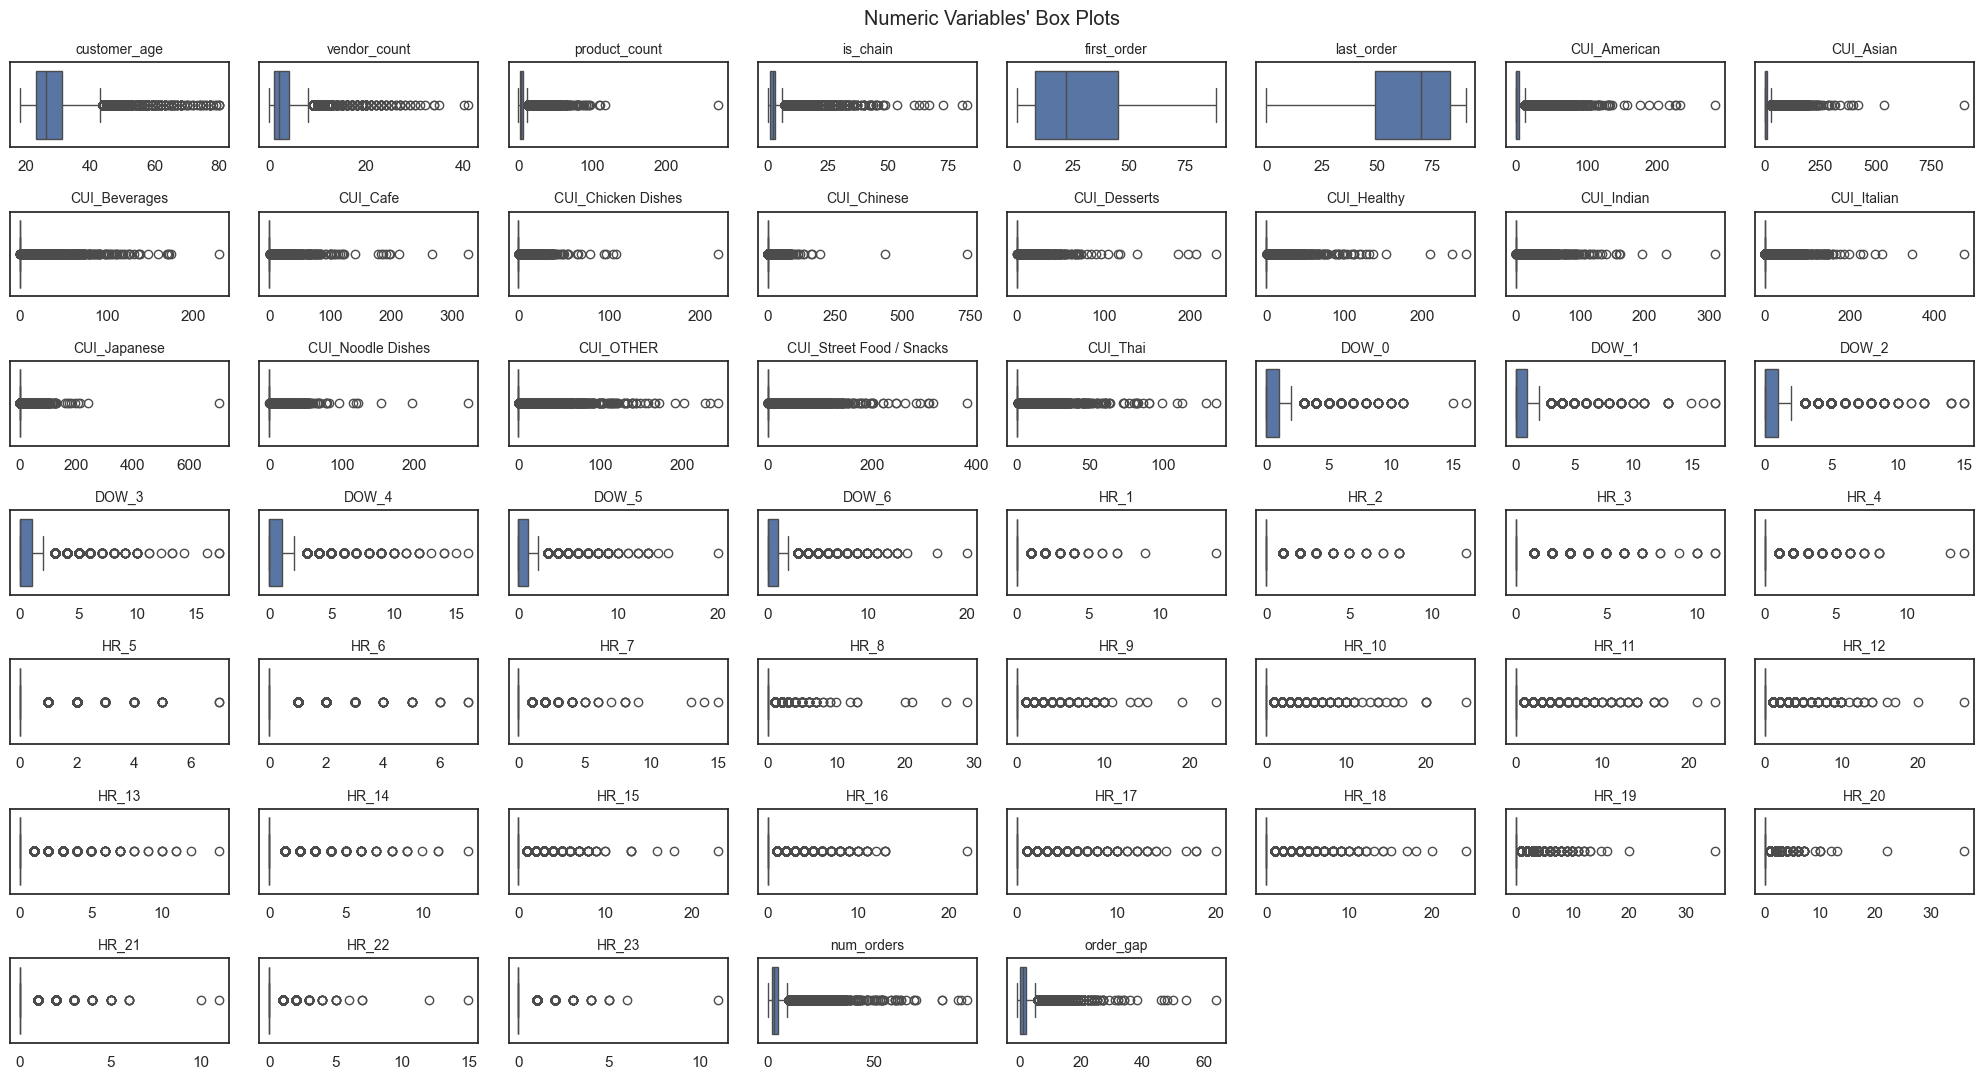

In [120]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each boxplot. Hint: don't forget to attach the boxplot to the current ax
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_visualizations[feat], ax=ax)
    ax.set_title(feat, fontsize=10)  # Set title
    ax.xaxis.set_label_position('top')  # Move the label to the top
    ax.set_xlabel('')  # Remove the default x-axis label at the bottom

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

# Reset theme to "darkgrid"
sns.set()

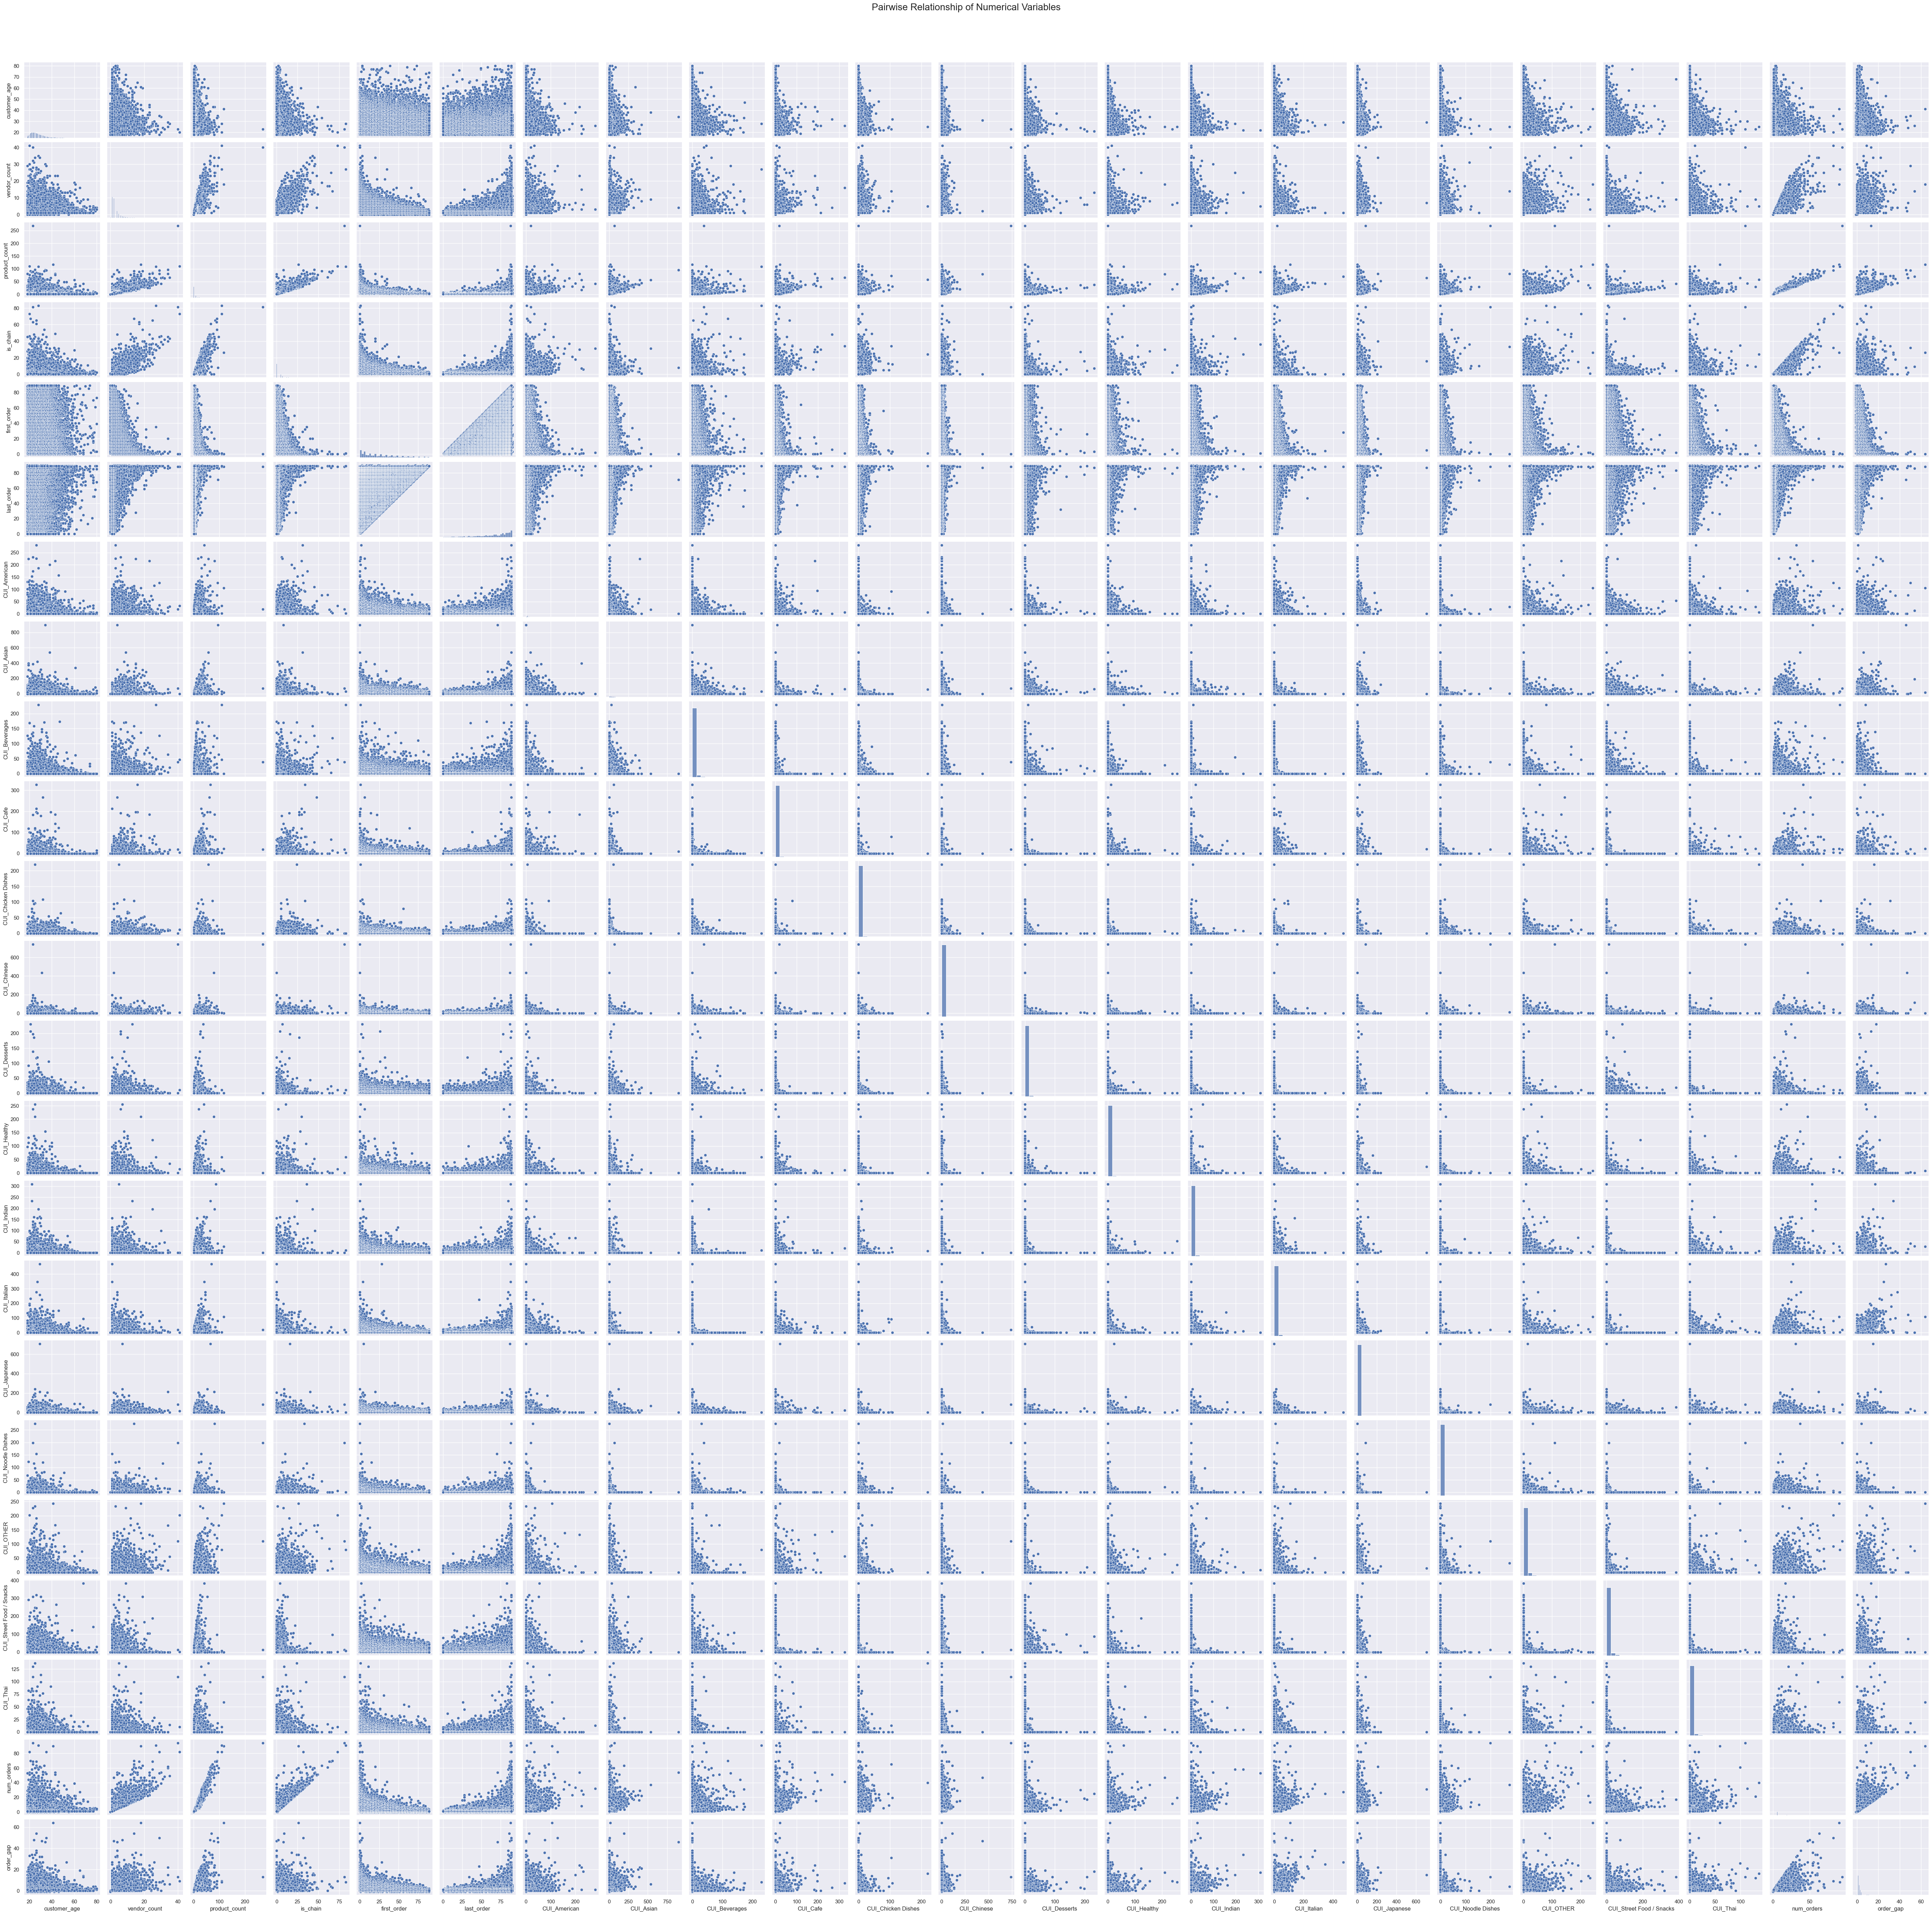

In [121]:
# Pairwise Relationship of Numerical Variables excluding DOW and HR
sns.set()

# Setting pairplot
sns.pairplot(df_visualizations[metric_features_excluding_dow_and_hr], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
    
# plt.savefig(os.path.join('..', 'figures', 'eda', 'pairwise_numeric_scatterplots_excluding_dow_and_hr.png'), dpi=200)
plt.show()

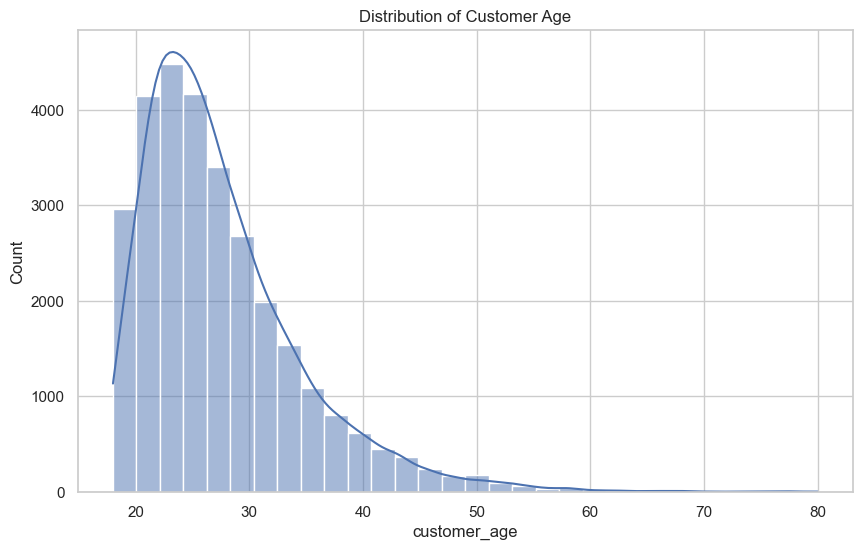

The average age : 28
The median age : 26


In [122]:
# distribution of customer_age
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df_visualizations['customer_age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# average and median age
print('The average age :', round(df_visualizations['customer_age'].mean(skipna=True)))
print('The median age :', int(df_visualizations['customer_age'].median()))

In [123]:
metric_features_excluding_dow_and_hr

['customer_age',
 'vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'num_orders',
 'order_gap']

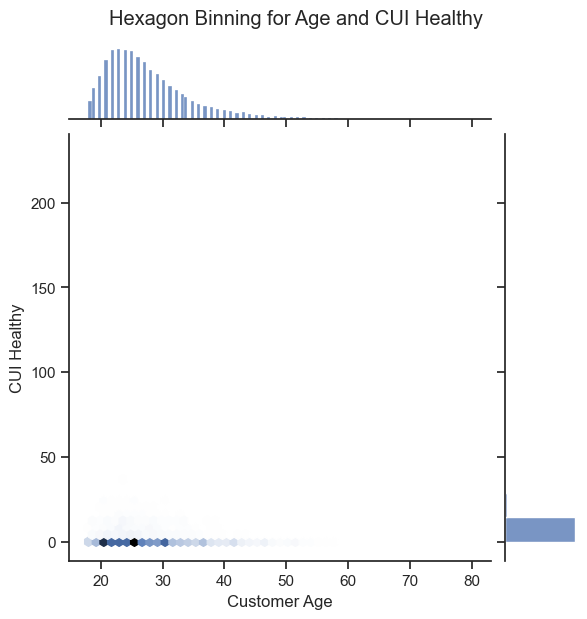

In [124]:
# Set the theme and style for the plot. 'ticks' removes gridlines but keeps ticks on axes
sns.set(style="ticks")

# Create a hexbin jointplot for 'customer_age' and 'CUI_Healthy'
g = sns.jointplot(data=df_visualizations, 
                  x="customer_age",   # X-axis: Customer Healthy
                  y="CUI_Beverages",  # Y-axis: CUI Beverages consumption
                  kind="hex",         # 'hex' creates hexagonal binning for density visualization
                 )

# Add a title to the entire figure, adjusting its vertical position with 'y'
g.fig.suptitle("Hexagon Binning for Age and CUI Healthy", y=1.03)

# Set the axis labels
g.set_axis_labels("Customer Age", "CUI Healthy", fontsize=12)

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# Display the plot
plt.show()

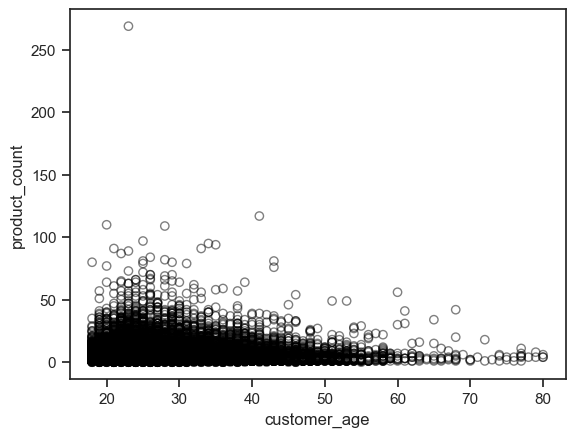

In [125]:
# Pair of Metric Variables Scatter Plot

plt.scatter(df_visualizations["customer_age"], df_visualizations["product_count"], 
            edgecolors="black", # Draw the edges of each point
            alpha=.5, # change opacity level of each point
            color='none' # remove the fill color of each point
           )

plt.xlabel("customer_age")
plt.ylabel("product_count")

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

Specify a custom color using the cmap parameter: `cmap=""`<br>
**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

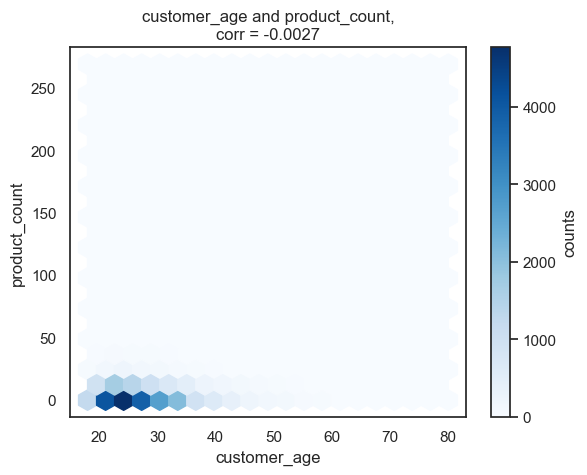

In [126]:
sns.set(style="white")
fig, ax = plt.subplots()
cat1 = 'customer_age'
cat2 = 'product_count'

hb = ax.hexbin(df_visualizations[cat1], df_visualizations[cat2], 
               gridsize=20,
               cmap='Blues'
              )

ax.set_title("{} and {},\ncorr = {}".format(cat1, cat2, 
                                            np.round(df_visualizations[['customer_age','CUI_Beverages']].corr().values[0,1],4)))
ax.set_xlabel(cat1)
ax.set_ylabel(cat2)

cb = fig.colorbar(hb, ax=ax, label='counts')

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

Improve the previous hexbin (original code already copied below)

Specify a custom color using the cmap parameter: `cmap=""`


**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

> ## 4.7. Correlation Matrix <a class="anchor" id="correlation_matrix"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

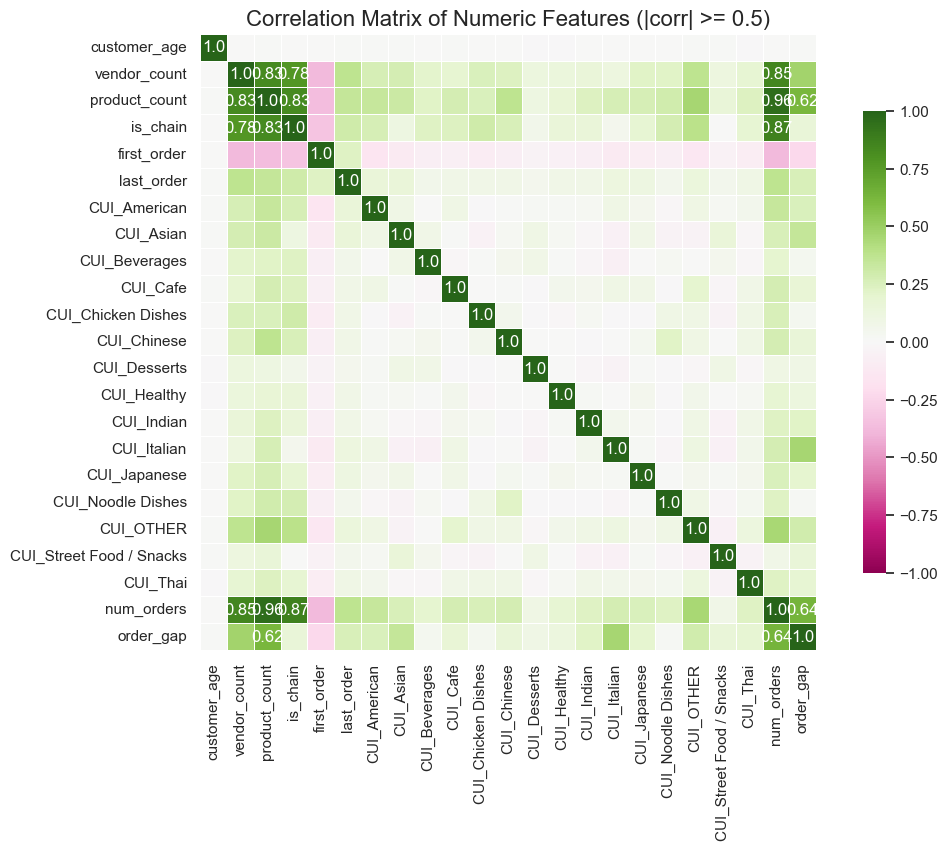

In [127]:
# Prepare figure with a specified size for better clarity
fig = plt.figure(figsize=(12, 8))

# Compute the correlation matrix using the Pearson method for metric features (excluding DOW and HR columns)
corr = df_visualizations[metric_features_excluding_dow_and_hr].corr(method="pearson").round(2)

# Create a mask to annotate only correlations that are very high or very low (above |0.5|)
# Absolute value of the correlation matrix is checked to annotate values >= 0.5 or <= -0.5
mask_annot = np.absolute(corr.values) >= 0.5

# Annotate the heatmap: if the mask condition is True (|value| >= 0.5), display the correlation value; otherwise, leave it blank
annot = np.where(mask_annot, corr.values, "")  # Blank cells for correlations not meeting the threshold

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot,         # Use custom annotations with the mask applied
            fmt='s',             # Format annotations as strings to handle empty cells
            vmin=-1, vmax=1,     # Set the color scale range for correlation (-1 to 1)
            center=0,            # Center the colormap at 0 for balanced visual contrast
            square=True,         # Make each cell a square shape
            linewidths=0.5,      # Add thin lines between cells for better aesthetics
            cmap='PiYG',         # Use a perceptually uniform diverging colormap (Purple to Yellow-Green)
            cbar_kws={'shrink': .75} # Shrink the color bar to avoid overlapping with plot
           )

# Add a title to the heatmap
plt.title("Correlation Matrix of Numeric Features (|corr| >= 0.5)", fontsize=16)

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# Display the heatmap
plt.show()

> ## 4.8. Outliers <a class="anchor" id="outliers"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [128]:
df = df_visualizations.copy()

In [129]:
from pylab import rcParams
rcParams["figure.figsize"] = 25, 15

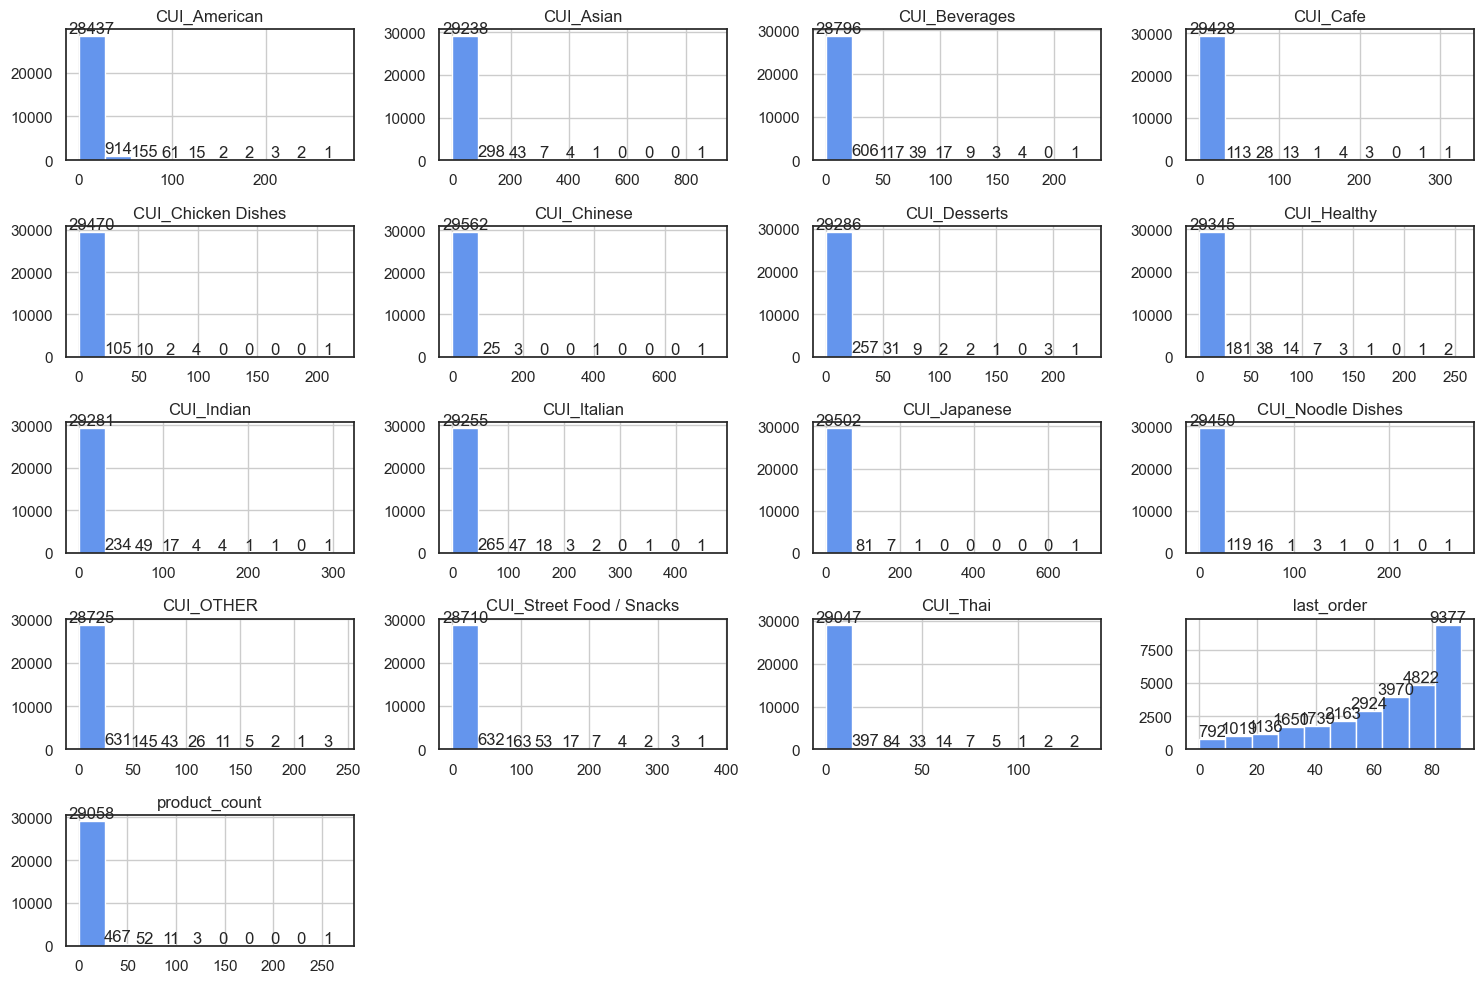

In [130]:
import matplotlib.pyplot as plt

# Plot the histograms for each column
axes = df[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai","last_order","product_count"]].hist(color="cornflowerblue", figsize=(15, 10))

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f"{int(height)}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Since almost every graph shows an outlier, let’s determine if this customer has high spending across all categories or if they differ significantly in specific Cui features

In [131]:
df_temp= df[df["CUI_Asian"]>600]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
249ba584d3            0.0     896.71            0.0      9.08   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
249ba584d3                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
249ba584d3          0.0         2.07           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  
customer_id                                                 
249ba584d3         0.0                       0.0       0.0

In [132]:
df_temp= df[df["CUI_American"]>200]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
e3d7150447         216.44       9.40           0.00    185.73   
9b7035b6a3         223.93     395.70          18.56      0.00   
d5f32ee976         231.75      11.92           0.00      0.00   
4f75dc005b         280.21       0.00           0.00      0.00   
c105adcd06         225.11       0.00           0.00      0.00   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
e3d7150447                  0.0          0.0           0.0          8.6   
9b7035b6a3                  0.0          0.0           0.0          0.0   
d5f32ee976                  0.0          0.0           0.0          0.0   
4f75dc005b                  0.0          0.0           0.0          0.0   
c105adcd06                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
e3d7150447          0.0        12.44           0.0                0.0   
9b7035b6a3          0.0         0.00           0.0                0.0   
d5f32ee976          0.0         0.00           0.0                0.0   
4f75dc005b          0.0         0.00           0.0                0.0   
c105adcd06          0.0         0.00           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  
customer_id                                                 
e3d7150447      132.66                      0.00      0.00  
9b7035b6a3        0.00                     60.29      0.00  
d5f32ee976        0.00                      6.25      0.00  
4f75dc005b        0.00                      0.00     12.43  
c105adcd06        0.00                      0.00      0.00

In [133]:
df_temp= df[df["CUI_Chinese"]>500]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
92ced2dcb9          19.08      70.01          37.92      18.3   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
92ced2dcb9                  0.0       739.73           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
92ced2dcb9          0.0        20.11         84.05             197.84   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  
customer_id                                                 
92ced2dcb9      109.31                     12.34    109.64

As we can see its different customers, so idk if we should remove.

In [134]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'num_orders', 'order_gap'],
      dtype='object')

In [135]:
axes = df[["customer_region", "customer_age", "vendor_count", "weekend_orders", "weekday_orders", "orders_dawn","orders_morning", "orders_afternoon", "orders_evening",
       "Healthiness_Index","is_chain"]].hist( color="cornflowerblue")

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f"{int(height)}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

KeyError: "['weekend_orders', 'weekday_orders', 'orders_dawn', 'orders_morning', 'orders_afternoon', 'orders_evening', 'Healthiness_Index'] not in index"

In [71]:
df[df["orders_morning"]>50]

KeyError: 'orders_morning'

In [124]:
import seaborn as sns

# Function to create a bar plot with counts above each bar
def plot_bar_with_counts(column, title):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=column, palette="Set3")
    plt.title(title)
    plt.ylabel("Count")
    
    # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=12, color="black", xytext=(0, 5), 
                    textcoords="offset points")

    plt.show()

# Plot bar charts with counts
plot_bar_with_counts("generation", "Distribution of Generation")
plot_bar_with_counts("last_promo", "Distribution of Last Promo")
plot_bar_with_counts("payment_method", "Distribution of Payment Method")
plot_bar_with_counts("used_last_promo", "Distribution of Used last Promo")
plot_bar_with_counts("customer_region", "Distribution of Customer Region")

ValueError: Could not interpret value `generation` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x400 with 0 Axes>

<a id = "feature_engineering"></a>

## 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[Back to ToC](#toc)<br>

> ## 5.1. Total Cuisine Spending <a class="anchor" id="total_cuisine_spending"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Estimate the customer lifetime value based on the total spending across all cuisines.

In [125]:
df.filter(like="CUI_").describe()

CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  29592.000000  29592.000000   29592.000000  29592.000000   
mean       4.711070      9.261612       2.218993      0.797865   
std       11.379432     21.912378       8.196161      6.354070   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        5.362500     11.350000       0.000000      0.000000   
max      280.210000    896.710000     229.220000    326.100000   

       CUI_Chicken Dishes   CUI_Chinese  CUI_Desserts   CUI_Healthy  \
count        29592.000000  29592.000000  29592.000000  29592.000000   
mean             0.747386      1.371918      0.831662      0.948005   
std              3.535430      7.832134      5.094929      5.826970   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      0.000000      0.000000      0.000000   
max            219.660000    739.730000    230.070000    255.810000   

         CUI_Indian   CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
count  29592.000000  29592.000000  29592.000000       29592.000000   
mean       1.628805      3.297486      2.985906           0.687923   
std        7.479842     11.459012     10.193940           4.455876   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      0.000000           0.000000   
75%        0.000000      0.000000      0.000000           0.000000   
max      309.070000    468.330000    706.140000         275.110000   

          CUI_OTHER  CUI_Street Food / Snacks      CUI_Thai  
count  29592.000000              29592.000000  29592.000000  
mean       3.024392                  3.721173      0.838014  
std        9.679802                 14.821746      4.382060  
min        0.000000                  0.000000      0.000000  
25%        0.000000                  0.000000      0.000000  
50%        0.000000                  0.000000      0.000000  
75%        0.000000                  0.000000      0.000000  
max      243.180000                382.390000    136.380000

In [126]:
# Select all columns that start with "CUI_"
cui_columns = df.filter(like="CUI_").columns

# Sum these columns row-wise and create a new column "CUI_all"
df["total_cui_spending"] = df[cui_columns].sum(axis=1)

In [127]:
df["total_cui_spending"].describe()

count    29592.000000
mean        37.072208
std         44.216134
min          0.000000
25%         12.680000
50%         23.920000
75%         43.782500
max       1418.330000
Name: total_cui_spending, dtype: float64

> ## 5.2. Weekend and Weekday Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [128]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df["weekend_orders"] = df["DOW_0"] + df["DOW_6"]

# Create a column for weekday orders (DOW_1 to DOW_5)
df["weekday_orders"] = df[["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5"]].sum(axis=1)

In [129]:
df[["weekend_orders", "weekday_orders"]].describe()

weekend_orders  weekday_orders
count    29592.000000    29592.000000
mean         1.222324        3.035483
std          1.723752        3.671521
min          0.000000        0.000000
25%          0.000000        1.000000
50%          1.000000        2.000000
75%          2.000000        4.000000
max         35.000000       67.000000

> ## 5.3. Generation <a class="anchor" id="generation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a categorical feature that groups customers by generation

In [130]:
df["customer_age"].describe()

count    29592.000000
mean        27.635746
std          7.113368
min         18.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

In [131]:
# Define bins and labels for the generation categories
bins = [14, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age
df["generation"] = pd.cut(df["customer_age"], bins=bins, labels=labels)

In [132]:
df["generation"].describe()

count           29592
unique              5
top       Millennials
freq            14362
Name: generation, dtype: object

> ## 5.4. Hourly Orders Aggregation by Time of Day <a class="anchor" id="hourly_orders_aggregation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [133]:
# Define the hour ranges for each period
dawn_hours = df.loc[:, "HR_1":"HR_5"].sum(axis=1)  # HR_1 to HR_5
morning_hours = df.loc[:, "HR_6":"HR_11"].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df.loc[:, "HR_12":"HR_17"].sum(axis=1)  # HR_12 to HR_17
evening_hours = df.loc[:, "HR_18":"HR_23"].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df["orders_dawn"] = dawn_hours
df["orders_morning"] = morning_hours
df["orders_afternoon"] = afternoon_hours
df["orders_evening"] = evening_hours

In [134]:
df[["orders_dawn", "orders_morning", "orders_afternoon", "orders_evening"]].describe()

orders_dawn  orders_morning  orders_afternoon  orders_evening
count  29592.000000    29592.000000      29592.000000    29592.000000
mean       0.385036        1.204988          1.800656        0.867126
std        1.086333        2.185359          2.727190        1.876285
min        0.000000        0.000000          0.000000        0.000000
25%        0.000000        0.000000          0.000000        0.000000
50%        0.000000        1.000000          1.000000        0.000000
75%        0.000000        2.000000          2.000000        1.000000
max       25.000000       50.000000         52.000000       52.000000

> ## 5.5. Healthiness Index <a class="anchor" id="healthiness_index"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In [135]:
df["health_index"] = df["CUI_Healthy"] / df["total_cui_spending"]

In [136]:
df["health_index"].describe()

count    29456.000000
mean         0.025374
std          0.123440
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: health_index, dtype: float64

> ## 5.6. Last Promotion Indicator <a class="anchor" id="last_promotion_indicator"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a binary feature indicating whether the customer used a promotion in their last order. This can be helpful for analysis on promotional effectiveness.

In [137]:
# df['last_promo'].value_counts()

In [138]:
# df['used_last_promo'] = (df['last_promo'] != 'NONE').astype(int)

In [139]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'first_order', 'last_order', 'payment_method', 'CUI_American',
       'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes',
       'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian',
       'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4',
       'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12',
       'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20',
       'HR_21', 'HR_22', 'HR_23', 'total_orders', 'avg_daily_orders',
       'total_cui_spending', 'weekend_orders', 'weekday_orders', 'generation',
       'orders_dawn', 'orders_morning', 'orders_afternoon', 'orders_evening',
       'health_index'],
      dtype='object')

Vendor Diversity<br>
Measures the variety of vendors a customer orders from. Customers who order from many different vendors may have broader tastes or may be less loyal to any particular brand.

In [140]:
df["vendor_diversity"] = df["vendor_count"] / df["product_count"]

In [141]:
df["vendor_diversity"].describe()

count    29456.000000
mean         0.695608
std          0.259200
min          0.014286
25%          0.500000
50%          0.666667
75%          1.000000
max          1.000000
Name: vendor_diversity, dtype: float64

Average Daily Orders<br>
How frequently does the customer place an order? This could help distinguish regular customers from occasional ones.

In [142]:
df["total_orders"] = df[["DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6"]].sum(axis=1)

df["avg_daily_orders"] = (df["last_order"] - df["first_order"]) / df["total_orders"]

In [143]:
df["avg_daily_orders"].describe()

count    29353.000000
mean         8.501479
std          7.941184
min          0.000000
25%          1.000000
50%          7.166667
75%         12.800000
max         44.500000
Name: avg_daily_orders, dtype: float64

Order Recency<br>
How recent the customer’s last order is, normalized by the total duration of the dataset.<br>

In [144]:
df["order_recency"] = df["last_order"] / 90 # the dataset is about the last 3 months

In [145]:
df["order_recency"].describe()

count    29592.000000
mean         0.704697
std          0.258896
min          0.000000
25%          0.544444
50%          0.777778
75%          0.922222
max          1.000000
Name: order_recency, dtype: float64

Average Order Value<br>
This feature could help in identifying high-value customers who spend more per order.

In [146]:
df["average_order_value"] = df["total_cui_spending"] / df["total_orders"]

In [147]:
df["average_order_value"].describe()

count    29456.000000
mean        10.290443
std          7.886026
min          0.370000
25%          5.070000
50%          8.183333
75%         12.845417
max        104.320000
Name: average_order_value, dtype: float64

> ## 5.7. Chain order percentage <a class="anchor" id="Chain_order_percentage"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature indicating how often the customer ordered from chain_restaurants throughout their order history.

In [62]:
df['chain_perc'] = df['is_chain']/df['total_orders']

# show histogram of chain_perc
sns.histplot(df['chain_perc'], bins=10)
plt.title('Distribution of chain_perc')
plt.show()

NameError: name 'df' is not defined